# Approval Prediction With Artificial Neural Nets
---

## TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

#### BUSINESS CASE:
Build and train a simple deep neural network model to predict the likelihood of a liability customer (depositor) buying personal loans based on customer features like age, experience, income, locations, family, education, existing mortgage, and credit card, etc..

Lenddo is a leading startup that uses advanced machine learning to analyze over 12,000+ features from various sources of data to predict an individual's creditworthiness (e.g.: social media account use, geolocation data, etc.)

__Website:__ https://lenddo.com/

__Project idea from:__ https://emerj.com/ai-sector-overviews/artificial-intelligence-applications-lending-loan-management/

__Data Source:__ https://www.kaggle.com/datasets/surendharanp/personal-loan

## TASK #2: IMPORT DATASETS AND LIBRARIES

In [1]:
#!pip install jupyterthemes

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

In [3]:
# from jupyterthemes import jtplot
# jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 

In [4]:
# Load dataset
bank_df = pd.read_csv('UniversalBank.csv')

In [5]:
# check head of dataset
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
# Use bank_df.head() to show the first 10 rows in a dataframe
bank_df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [7]:
# Show last 10 rows in the dataframe
bank_df.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


In [8]:
# How many samples are present in the Universal Bank Dataset?
len(bank_df)

5000

In [9]:
bank_df.shape

(5000, 14)

## TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [10]:
# Obtain dataframe info
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


When we train ML models, we have to make sure we have no missing elements in our dataframe.

In [11]:
# Obtain the statistical summary of the dataframe
bank_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [12]:
# For better visualization
bank_df.describe().T
# this will transpose the table of the data where the header become rows

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [13]:
# See how many null values exist in the dataframe
bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [14]:
# What is the average age in this dataset?
bank_df.Age.mean()

45.3384

In [15]:
# What is the % of customers who have credit cards?
print('The percentage of customers who have credit cards with Universal Bank = ', bank_df['CreditCard'].sum() / len(bank_df) * 100, '%')

The percentage of customers who have credit cards with Universal Bank =  29.4 %


In [16]:
# What is the % of customers who accepted the personal loan?
print('The percentage of customers who accepted the personal loan with Universal Bank = ', bank_df['Personal Loan'].sum() / len(bank_df) * 100, '%')

The percentage of customers who accepted the personal loan with Universal Bank =  9.6 %


## TASK #4: PERFORM DATA VISUALIZATION

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

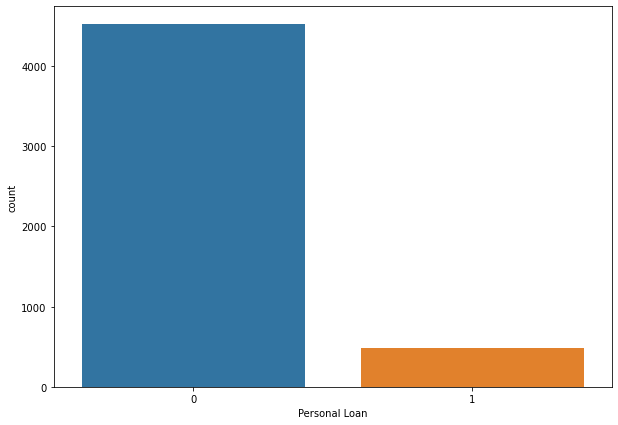

In [17]:
# Visualize personal Loan column 
# Percentage of customers who accepted personal loan ~ 9%
plt.figure(figsize=(10, 7))
sns.countplot(x=bank_df['Personal Loan'])

<AxesSubplot:xlabel='Education', ylabel='count'>

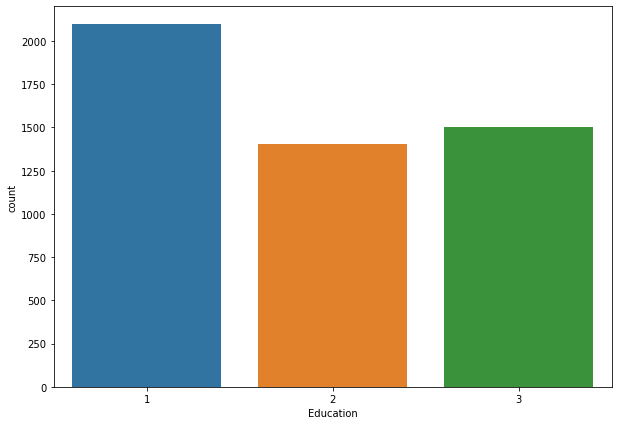

In [18]:
# Visualize Education feature
plt.figure(figsize=(10,7))
sns.countplot(x=bank_df.Education)

<AxesSubplot:xlabel='Age', ylabel='count'>

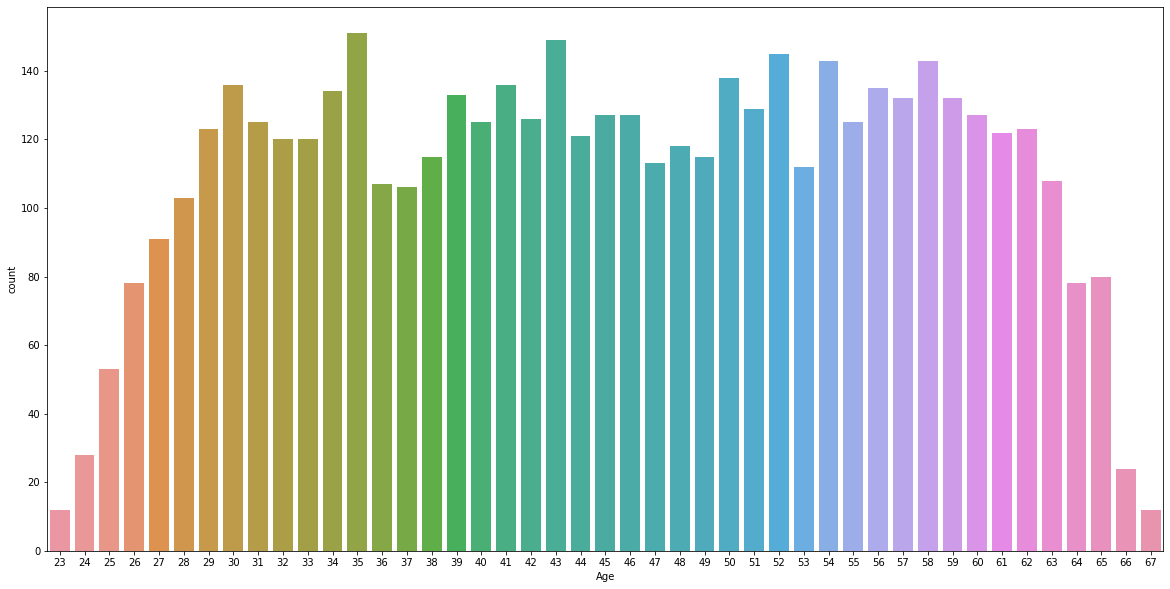

In [19]:
# Visualize Age
# Uniform distribution between 30-60 years
plt.figure(figsize=(20,10))
sns.countplot(x=bank_df.Age)

And as we cansee here, it looks like there is
a uniform distribution approximately between the age
of maybe 30 years old and 60 years old. Pretty consistent.
And then it tapered off as we go to 67 years old.
And it tapers as well down as we go to a younger age,
which, let's say, 23 years old.

<AxesSubplot:xlabel='CreditCard', ylabel='count'>

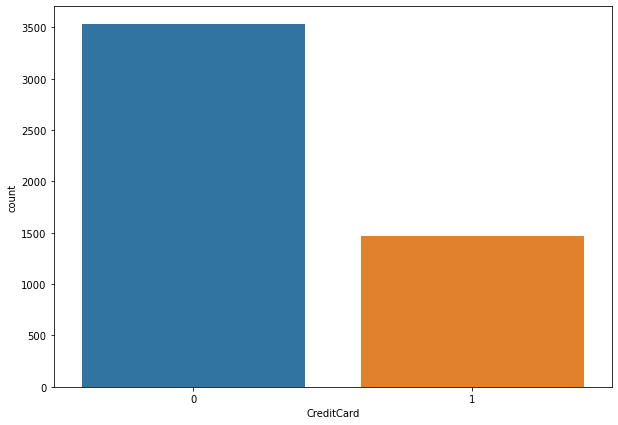

In [20]:
# Visualize credit card availability feature
# Recall that ~29% of customers have credit cards
plt.figure(figsize=(10,7))
sns.countplot(x=bank_df['CreditCard'])

C:\Users\user\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

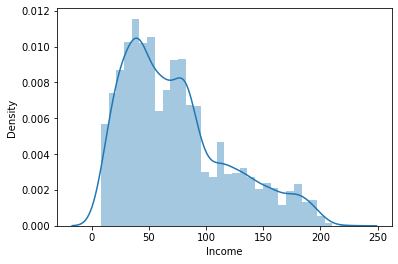

In [21]:
# Visualize income data
# Most customers have incomes that range between 45K and 60K per year
# Data is skewed with less customers earning above 100K
# let's use distplot
sns.distplot(bank_df.Income)

As we can see here, the data is a little bit
skewed, which means that most customers have income that range between, I would say, \\$1000 to maybe \\$60,000 and then it tapers off like slopes down until we go
beyond the \\$100,000 range, which makes sense, because 
the average salary or the average income in the US is
around \\$50,000 approximately.

In [22]:
# Create two dataframes for the two classes
personalloans = bank_df[bank_df['Personal Loan'] == 1]
no_personalloans = bank_df[bank_df['Personal Loan'] == 0]

In [23]:
personalloans

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
16,17,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
18,19,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
29,30,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
38,39,42,18,141,94114,3,5.0,3,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,4884,38,13,129,92646,3,4.1,3,0,1,0,1,1,1
4927,4928,43,19,121,94720,1,0.7,2,0,1,0,1,1,1
4941,4942,28,4,112,90049,2,1.6,2,0,1,0,0,1,0
4962,4963,46,20,122,90065,3,3.0,3,0,1,0,1,1,1


In [24]:
# apply describe
personalloans.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.0,480.000000,480.000000,480.00000,480.000000
mean,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,1.0,0.125000,0.291667,0.60625,0.297917
std,1394.393674,11.590964,11.582443,31.584429,1759.223753,1.115393,2.097681,0.753373,160.847862,0.0,0.331064,0.455004,0.48909,0.457820
min,10.000000,26.000000,0.000000,60.000000,90016.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
25%,1166.500000,35.000000,9.000000,122.000000,91908.750000,2.000000,2.600000,2.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
50%,2342.000000,45.000000,20.000000,142.500000,93407.000000,3.000000,3.800000,2.000000,0.000000,1.0,0.000000,0.000000,1.00000,0.000000
75%,3566.000000,55.000000,30.000000,172.000000,94705.500000,4.000000,5.347500,3.000000,192.500000,1.0,0.000000,1.000000,1.00000,1.000000
max,4981.000000,65.000000,41.000000,203.000000,96008.000000,4.000000,10.000000,3.000000,617.000000,1.0,1.000000,1.000000,1.00000,1.000000


Mean income of customers who have personal loans is generally high around(~) 144K and average credit card spending (CCAvg) of 3.9K.

In [25]:
# apply describe to no no personal loans
no_personalloans.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.0,4520.000000,4520.000000,4520.000000,4520.000000
mean,2512.165487,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.0,0.102212,0.035841,0.595796,0.293584
std,1448.299331,11.450427,11.456672,40.578534,2156.949654,1.148771,1.567647,0.839975,92.038931,0.0,0.302961,0.185913,0.490792,0.455454
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1259.750000,35.000000,10.000000,35.000000,91911.000000,1.000000,0.600000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,2518.500000,45.000000,20.000000,59.000000,93437.000000,2.000000,1.400000,2.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,3768.250000,55.000000,30.000000,84.000000,94608.000000,3.000000,2.300000,3.000000,98.000000,0.0,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,8.800000,3.000000,635.000000,0.0,1.000000,1.000000,1.000000,1.000000


Mean income of customers who do not have personal loans is generally low ~ 66K and average CC of 1.7K.

This tells us that people with higher income value tend to accepts personal loan from the bank.

C:\Users\user\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

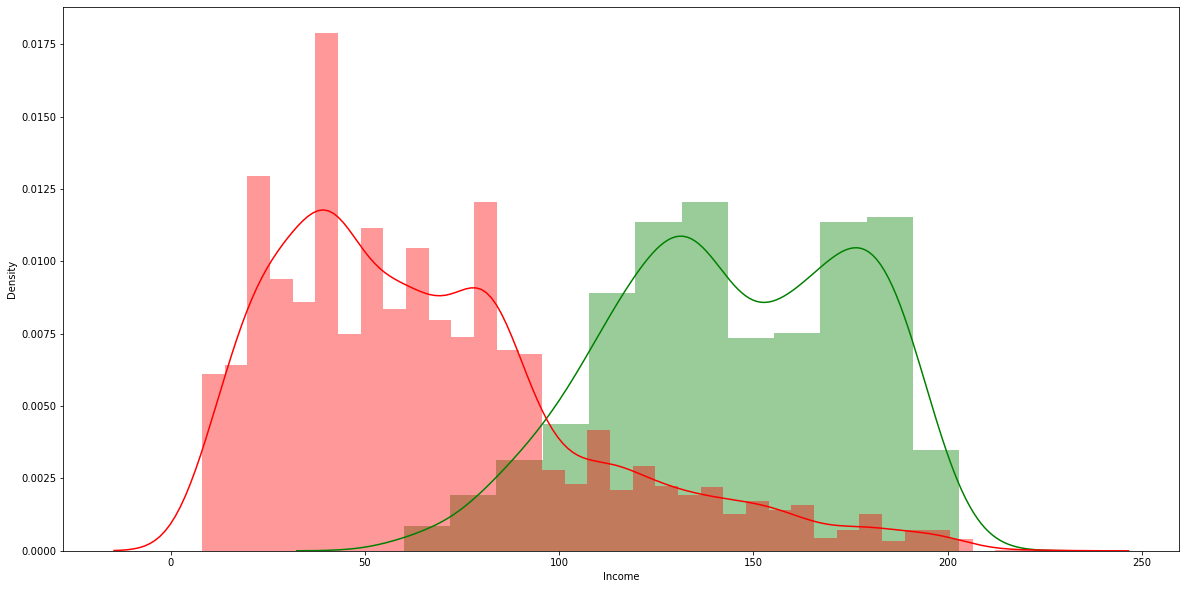

In [26]:
# Plot the distribution plot for both classes separately 
plt.figure(figsize=(20, 10))
sns.distplot(personalloans.Income, color = 'g')
sns.distplot(no_personalloans.Income, color = 'r')
# Customers who took personal loans tend to have higher income

We have here the distribution plot for both data frames separately. This gives us an idea that 
it seems the people who have higher incomes here tend to belong to the first group which is the Green group. These are the people who have personal loans.
They generally have higher average of around maybe 150k.

However, the other people have around income of around 60k.
They actually deny the person alone and did not accept it,
which is again a great piece of information.

<Figure size 2160x2160 with 0 Axes>

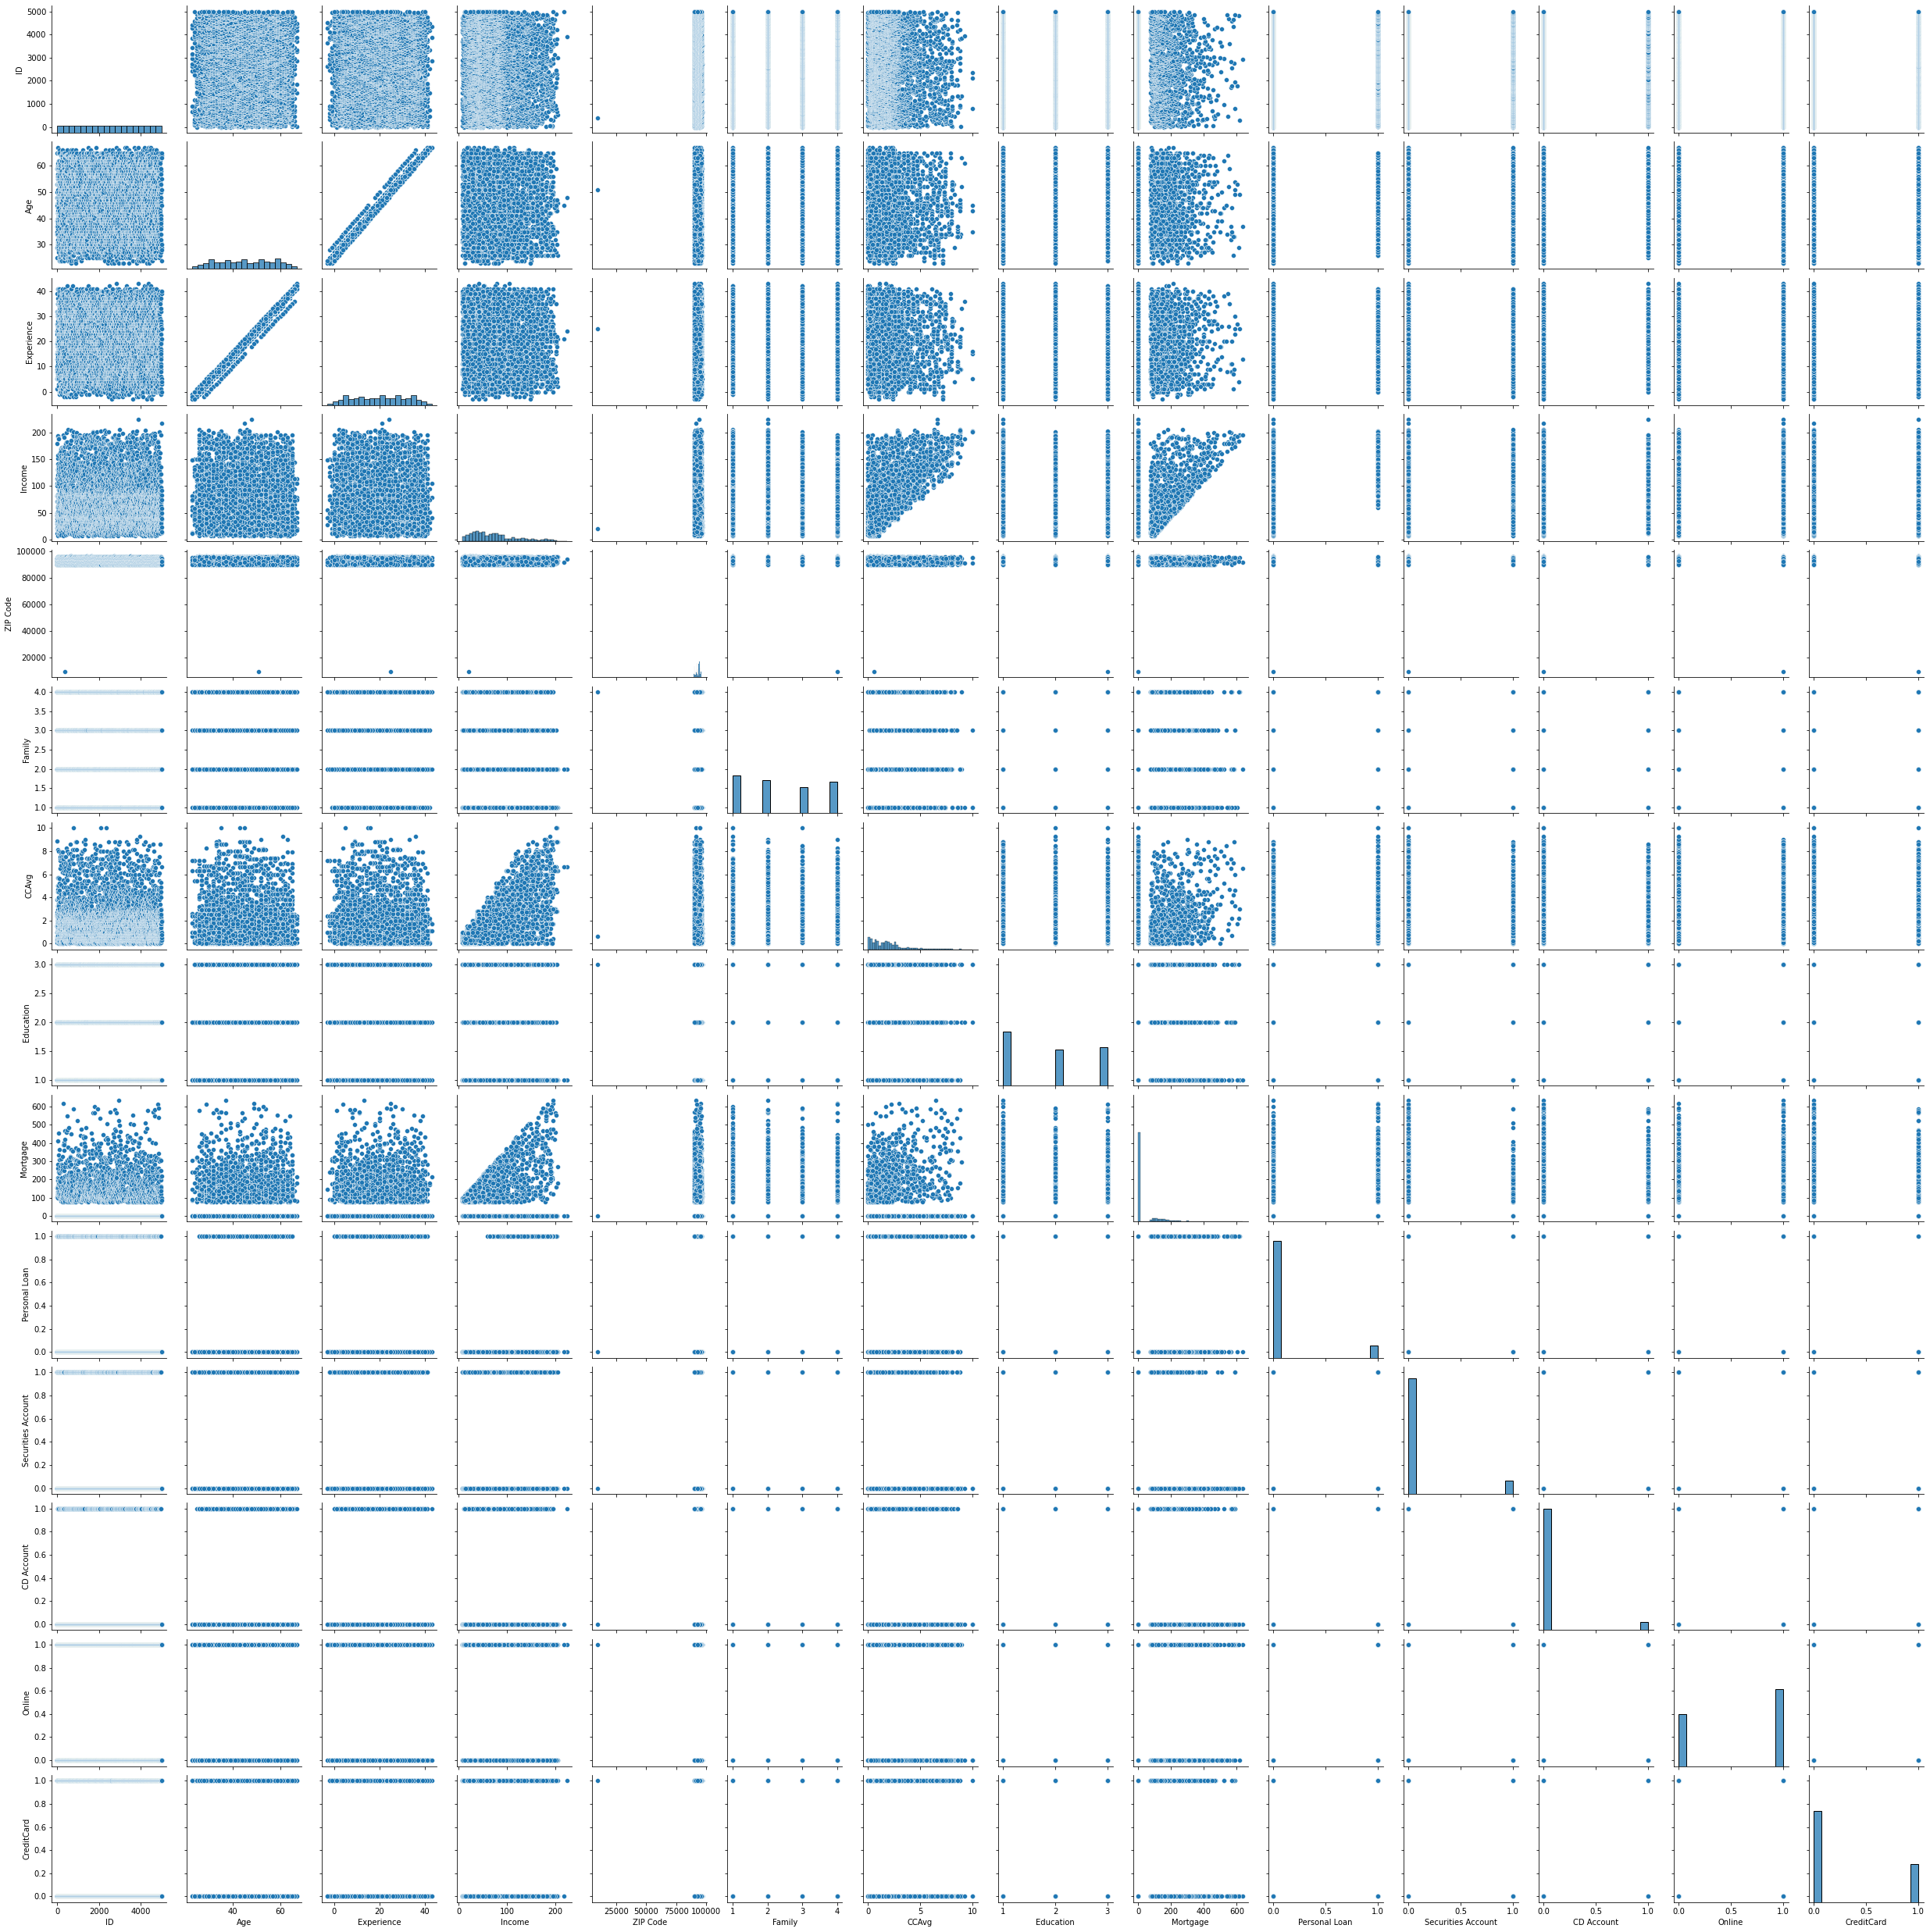

In [27]:
# Plot pairplot
plt.figure(figsize=(30, 30))
sns.pairplot(bank_df)

Here we have a summary of all the scatter plots for all
the different data that we have in our data frame.

<AxesSubplot:>

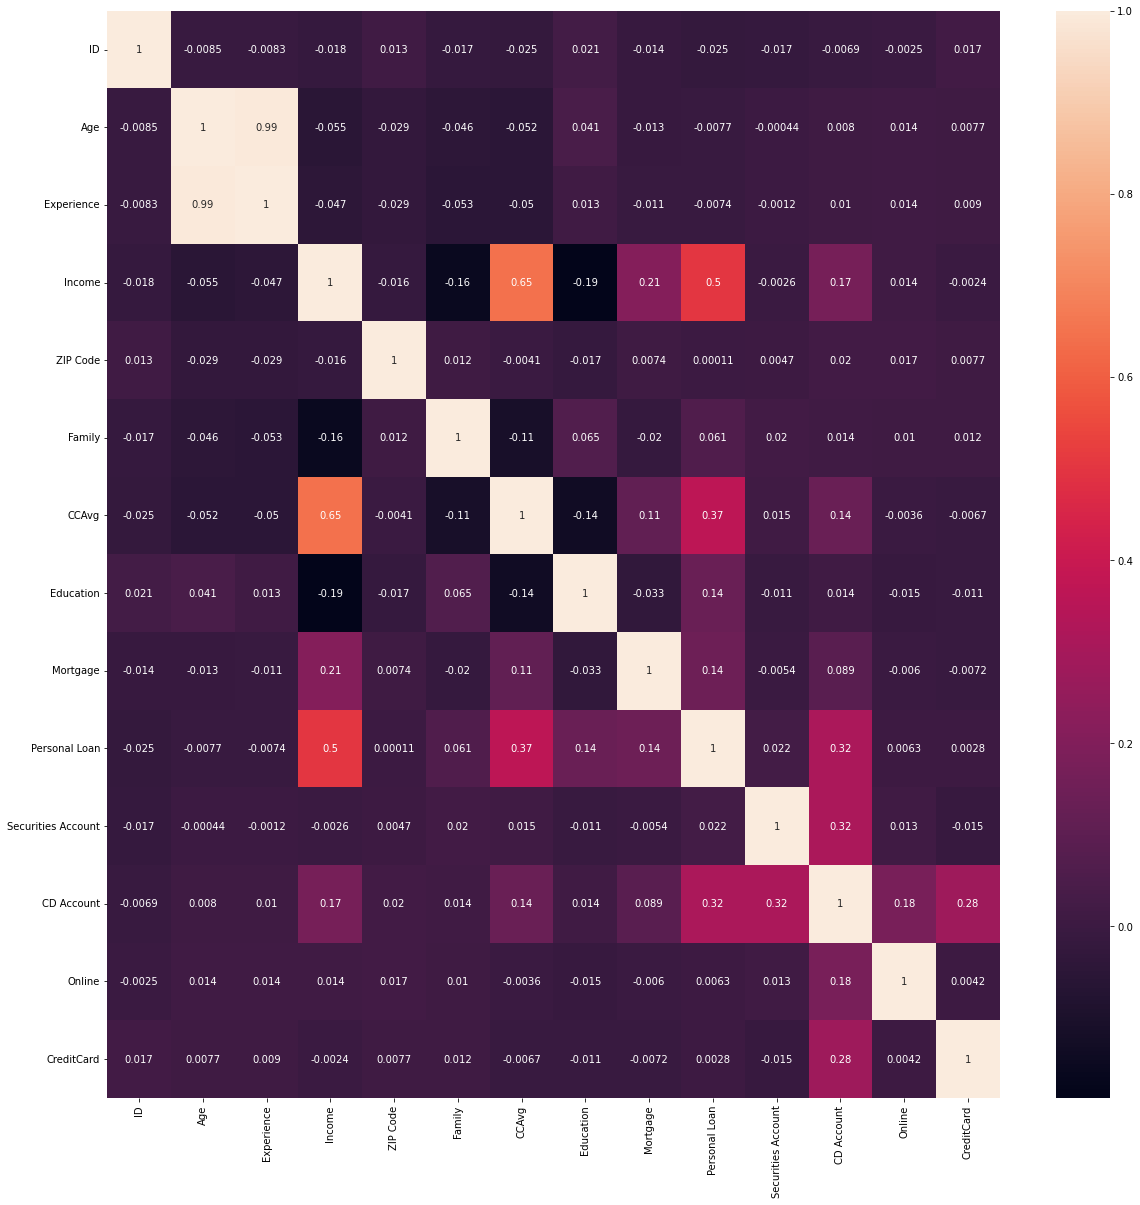

In [28]:
# Correlation plot
# use heatmap
plt.figure(figsize=(20,20))
cm = bank_df.corr()
sns.heatmap(cm, annot = True)

# Stong Positive correlation between experience and age
# Strong positive correlation between CC average and income

Here we have the correlation matrix for each of the variables that we have
in our dataframe.

For example, we will notice that there is a direct
positive correlation between the level of experience
or expertise of the customers and their age, which makes
complete sense.
Obviously, as people you know as they grow older, their number of years of experience increases. 

We also have here a positive correlation
of around 0.65 between the average credit card spending and their income.
So it seems that people who have higher income tend to use the credit card much more, and they also have higher average spending on their credit card as well.

C:\Users\user\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

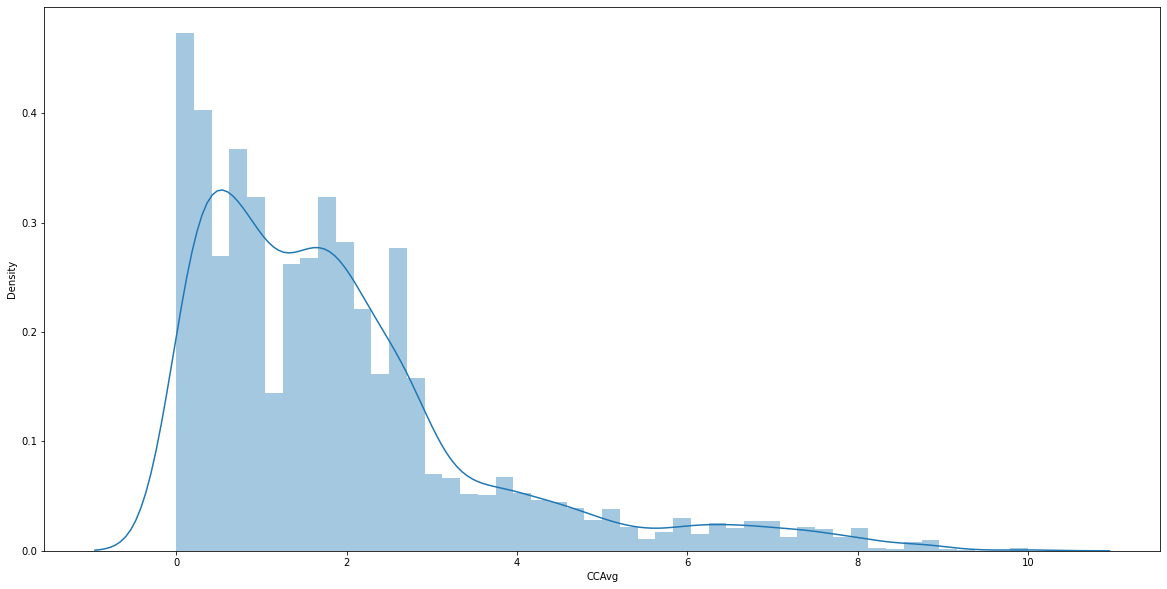

In [29]:
# Plot the distribution plot of the Average Credit Card Spending
plt.figure(figsize=(20,10))
sns.distplot(bank_df.CCAvg)

So it seems that a lot of people fall between the
category, which is between zero and maybe \\$2000 and then
it tapers off afterwards as you move forward to higher credit
card average of 4000, 6000 and \\$8000.

C:\Users\user\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

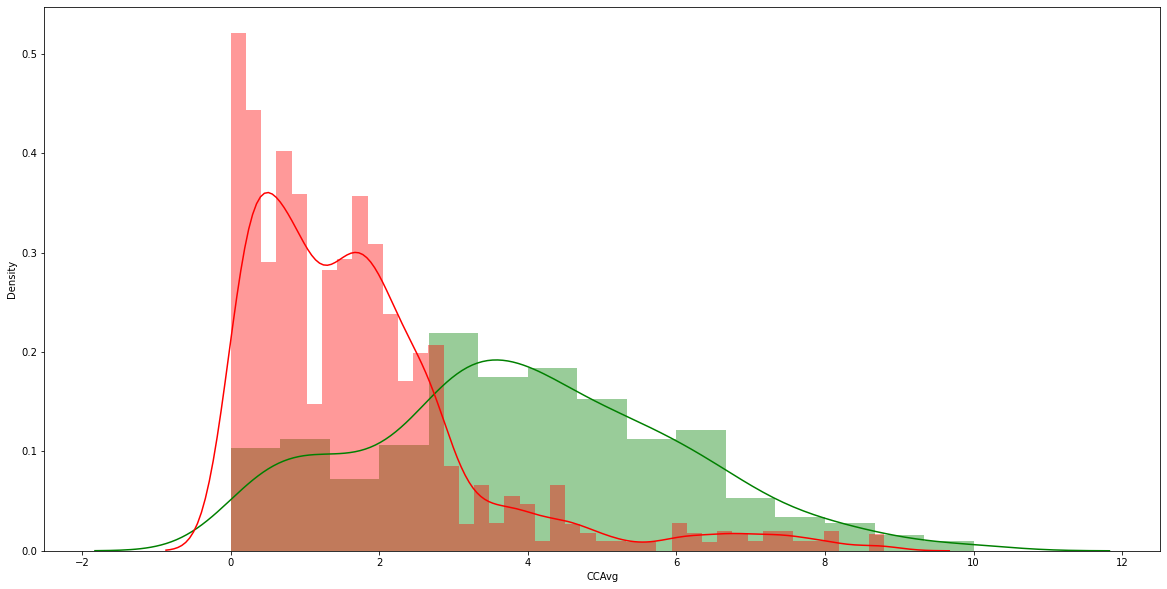

In [30]:
# Plot the distribution of the average credit spending for each of 
# the classes (personal loans = yes and personal loans = No)
plt.figure(figsize=(20, 10))
sns.distplot(personalloans.CCAvg, color = 'g')
sns.distplot(no_personalloans.CCAvg, color = 'r')

And that's again very consistent to the information that
we obtained earlier, which indicates that the Green Group,
which is the group that accepted the personal loan offer,
tend to have higher average credit card spending compared
to the other group who denied or declined the offer and did
not accept the personal loan offer from the bank. They tend to have lower credit card spending on average.

## TASK #5: PREPARE THE DATA BEFORE TRAINING THE MODEL

Now let's prepare our data before we train the model. Take the entire dataframe and divided into inputs and outputs.

The inputs of the model will be all features. Except for the personal loan column, which indicates whether the customer accepted the loan or not. And that essentially, will be our target variable.

In [31]:
# List all column names
bank_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [32]:
# Specify model input features (all data except for the target variable) 
# we'll assign our input features to X variable
X = bank_df.drop(columns='Personal Loan')
X

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0


In [33]:
# Model output (target variable)
# assign our target variable to lower case "y"
y = bank_df['Personal Loan']
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

Here, we have just bunch of ones and zeros indicating whether the customer accepted the personal loan or not. Next, let's convert the one single column "y" in the output into two outputs.
We're gonna call them basically 1, 0 or 0 and 1 indicating the two classes that we have. 
That will come really handy when we start to train our neural network.

In [34]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

So now we will see that the output have two columns per row.
We have 1 and 0 or 0 and 1 indicating with either the first class or the second class.

Now let's use scikit learn to print outr various KPIs. For exampe, we can printout the confusion matrix, the classification report, the precision, accuracy, recall and so on..

In [35]:
# enable this block only if scikit learn has not been installed yet
# !pip install sklearn

In [36]:
# scale the data before training the model
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# we are going to use StandardScaler to scale our data, kind of normalize it. 
# So all the features that are being fed to our artificial nueral networks will 
# have equal weights. Think of it, for example, the age column or features, ranged between
# 23 and 67 yrs old, and if we try to compare to salaries that are ranging thousands, we will find
# that the salary feature will dominate the neural network. It will dominate the other lower
# features. We don't want that. We want to make sure that all features are normalized
# or scaled before we train our artificial neural network.

# Let's instantiate an object out of our class
scaler_x = StandardScaler()
# now lets apply fit transform method on our object to scale our data
X = scaler_x.fit_transform(X)

In [37]:
# spliting the data into testing and training sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [38]:
# print the shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 13), (1500, 13), (3500, 2), (1500, 2))

Here we see the number of samples(rows) and features(columns) for training and testing data. Which make sense that if we add them up, we get the total number of our original number of samples of our dataframe.

## TASK #6: BUILD A SIMPLE MULTI LAYER NEURAL NETWORK MODEL

In [39]:
# keras is an API that sits on top of tensorflow 2.0.
# Create keras sequential model
ANN_model = keras.Sequential() # artificial nueral network model object. its building a lego.

# Add dense layer
ANN_model.add(Dense(250, # this refers to number of neurons
                    input_dim = 13, # this is because we have 13 features in our data
                    kernel_initializer = 'normal', # initialize the values of weight. This can be set to random or normal.
                    activation = 'relu')) # means rectified linear unit activation function. 
                                          # This is a function the generates zero as long as 
                                          # the input is negative. If the input is positive, 
                                          # we just pass it as is.

ANN_model.add(Dropout(0.3)) # dropout is technique known as a regularization technique.
                            # It's simply a way to try to ensure that the artificial neural
                            # network is not over fitting the training data.
                            # It would randomly drop a couple of neurons when we train 
                            # the network. This technique actually generates amazing 
                            # results. It just improve the generalization ability of 
                            # the network and it make it extremely robust.

# add an additional dense layers
ANN_model.add(Dense(500,  activation='relu'))

# add two additional dropout followed by another dense layer
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(500,  activation='relu'))

ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(500,  activation='relu'))

# add another but specify the dropout to be 0.4 and 250 neurons 
# and the activiation is linear.
ANN_model.add(Dropout(0.4))
ANN_model.add(Dense(250,  activation='linear'))

# add another dropout set to 0.4
ANN_model.add(Dropout(0.4))

# Add dense layer (output layer) with softmax activation
ANN_model.add(Dense(2, activation = 'softmax')) # 
# we set the output layer with two neurons only because we did two categorical 
# to the "y" which is our target variable. 

# If it's the first neuron fires, that means the client has accepted the personal loan.
# If the second neuron fired, that means the client has declined the personal loan.
# The activation function, we set it to Soft Max.
# The idea here is that because we want the output to be
# saturated and that's why we're using a soft max activation
# function in the output.

# add summary so that it can show us the summary for the entire network
# at the end.
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               3500      
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense_1 (Dense)             (None, 500)               125500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense_3 (Dense)             (None, 500)               2

In the summary it shows us we have 755,752 total number of trainable parameters. And these are the parameters that the Gradient descent algorithm will try to optimize and obtain.

MINI CHALLENGE #5:
- Create a new model with an additional Fully connected layer with 500 neurons and linear activation function
- Print out the model summary. Roughly, how many trainable parameters have been newly introduced?

## TASK #7: COMPILE AND TRAIN DEEP LEARNING MODEL

In [40]:
# Compile the model
ANN_model.compile(loss = 'categorical_crossentropy', 
                  optimizer = 'adam', metrics=['accuracy'])

In [41]:
# fit training data to the model
history = ANN_model.fit(X_train, y_train, 
                        epochs=20, 
                        validation_split=0.2, # This means that we are taking our 
                                              # training data set, further dividing it 
                                              # into validation and training.
                                              # So what we're doing here is that the model
                                              # is being trained as we're running the model.
                                              # We want to make sure that the model is not 
                                              # over fitting the training data, which means 
                                              # that the model learns all the ins and outs, 
                                              # all the details of the training data.
                                              # We wanted to ensure that our model is able
                                              # to generalize and not memorize.
                        verbose = 1) # verbose essentially is the amount of content that
                                     # is going to be printed out here.

Epoch 1/20
88/88 [==============================] - 2s 16ms/step - loss: 0.1909 - accuracy: 0.9293 - val_loss: 0.1061 - val_accuracy: 0.9686
Epoch 2/20
88/88 [==============================] - 1s 13ms/step - loss: 0.1044 - accuracy: 0.9604 - val_loss: 0.0884 - val_accuracy: 0.9671
Epoch 3/20
88/88 [==============================] - 1s 13ms/step - loss: 0.0798 - accuracy: 0.9739 - val_loss: 0.0869 - val_accuracy: 0.9700
Epoch 4/20
88/88 [==============================] - 1s 12ms/step - loss: 0.0755 - accuracy: 0.9729 - val_loss: 0.0669 - val_accuracy: 0.9729
Epoch 5/20
88/88 [==============================] - 1s 12ms/step - loss: 0.0636 - accuracy: 0.9775 - val_loss: 0.0759 - val_accuracy: 0.9686
Epoch 6/20
88/88 [==============================] - 1s 13ms/step - loss: 0.0599 - accuracy: 0.9761 - val_loss: 0.0821 - val_accuracy: 0.9771
Epoch 7/20
88/88 [==============================] - 1s 13ms/step - loss: 0.0555 - accuracy: 0.9839 - val_loss: 0.0888 - val_accuracy: 0.9614
Epoch 8/20
88

For every epoch here, we are updating the network weight.

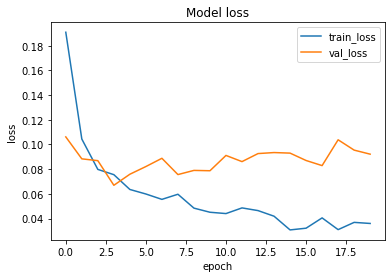

In [42]:
# Plot the model performance across epochs
plt.plot(history.history['loss']) # show the loss of the error on the training data.
plt.plot(history.history['val_loss']) # show the validation loss for the validation dataset.
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc = 'upper right')
plt.show()

If the validation loss here starts to increase, and training loss kept going down, that means that the model starts to overfit the training data and then starting to fail to generalize. And for that reason, maybe we may need to stop the training to a certain number of epochs.

## TASK #8: ASSESS THE PERFORMANCE OF THE TRAINED MODEL

So now that we have the trained model, which means now we applied
the optimizer, and we were able to obtain the optimized values
for the weights on biases for our network. Now we can take the artificial neural network model and apply the predict method on our model, pass it along the testing data. 

Remember that the testing data has never been seen by the model during training.
That's a crucial part because, as we mentioned, we want
to make sure that the model is able to generalize and not
memorize. We want to make sure that the model will still perform really
well even though the model has never seen this data ever before, which is the testing data.

In [43]:
# Make predictions
predictions = ANN_model.predict(X_test)

# Append the index of max value using argmax function
predict = []
for i in predictions:
    predict.append(np.argmax(i))

# The output might be one or zero, or zero or one indicating whether 
# the customer accepted the personal loan or not.

In [44]:
# apply the evaluate method
# Get the acccuracy of the model
result = ANN_model.evaluate(X_test, y_test)

print("Accuracy : {}".format(result[1]))

47/47 [==============================] - 0s 4ms/step - loss: 0.1246 - accuracy: 0.9687
Accuracy : 0.968666672706604


The accuracy on our testing data will be printed here. During the time when I train the model here, my output is 97% accuracy rate. Which is pretty great!

Now let's compare our original values to the predicted values and see how they differ.

In [45]:
# Get the original values
y_original = []

for i in y_test:
    y_original.append(np.argmax(i))

<AxesSubplot:>

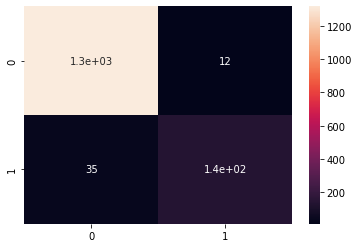

In [46]:
# Plot Confusion Matrix to properly visually the difference
confusion_matrix = metrics.confusion_matrix(y_original, predict)
sns.heatmap(confusion_matrix, annot = True)

The square on the left top (True Positive) refers to the nubmer of samples that has been correctly classified. The square on the right bottom (True Negative) are number of the samples that the model has correctly classified.

And the remaining boxes refers to the number of samples that the model has messed up.
Basically, the model said that the customer accepted the personal loan.
However, in reality, the customer denied the personal loan.
And this is essentially the number of samples that have been misclassified.

In [57]:
# Print out the classification report
from sklearn.metrics import classification_report

print(classification_report(y_original, predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1328
           1       0.92      0.80      0.85       172

    accuracy                           0.97      1500
   macro avg       0.95      0.89      0.92      1500
weighted avg       0.97      0.97      0.97      1500



Here we are able to come up with the summary of all the information of our classifier.

As we can see here, the overall accuracy of the model is around 95% which is pretty great.
We will also find that the precision is around
97, 92 for both classes.

The recall is around 0.99 and 0.83 which is pretty great.
F1-score is the harmonic mean
between the precision and recall. The performance of the model is actually pretty
great, 98% and 85%.